In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt 
from sklearn.metrics import confusion_matrix
from matplotlib import cm
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.style.use('seaborn')

In [2]:
train_shirt_x = pd.read_csv('troudress_train_x.csv')
test_shirt_x = pd.read_csv('troudress_test_x.csv')
train_shirt_y = pd.read_csv('troudress_train_y.csv')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(train_shirt_x, train_shirt_y, test_size=0.3, random_state=8)
for data in [X_train, X_test, y_train, y_test]:
    print(data.shape)

(8400, 784)
(3600, 784)
(8400, 1)
(3600, 1)


### Without Features Transformation & without penalty

In [11]:
lr_clf1 = LogisticRegression(solver='liblinear')
lr_clf1.fit(X_train, y_train)
y_predict = lr_clf1.predict(X_test)
proba = lr_clf1.predict_proba(X_test)
# y_predict.shape

acc1 = lr_clf1.score(X_test,y_predict)
print("The accuracy for the basic model on test set is: %.3f" % acc1)
acc2 = lr_clf1.score(X_train,y_train)
print("The accuracy for the basic model on train set is: %.3f" % acc2)
log_loss1 = log_loss(y_test, y_predict)
print("The log loss for the basic model is: %.3f" % log_loss1)

D:\conda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy for the basic model on test set is: 1.000
The accuracy for the basic model on train set is: 0.974
The log loss for the basic model is: 2.197


In [12]:
tn, fp, fn, tp = confusion_matrix(y_test,y_predict).ravel()
(tn, fp, fn, tp)

(1712, 119, 110, 1659)

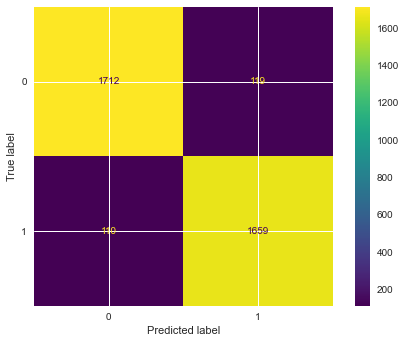

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

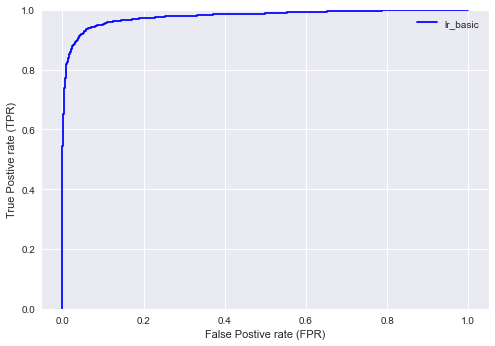

In [14]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, proba[:,1])
# fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, proba)

plt.plot(fpr, tpr,color='blue', label='lr_basic')
# plt.plot(fpr2, tpr2,color='red', label='CCCV')

plt.ylim([0, 1]);
plt.xlabel("False Postive rate (FPR)")
plt.ylabel("True Postive rate (TPR)")
plt.legend()

In [15]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, proba[:,1])

0.9782228617809171

### Without Features Transformation & use L1 penalty

In [10]:
C_grid = np.logspace(-9, 6, 31)
acc_list = []
loss_list = []
for c in C_grid:
    lr_clf_c = LogisticRegression(penalty='l1',C=c, random_state=8, solver='liblinear')
    lr_clf_c.fit(X_train, y_train)
    y_predict_c = lr_clf_c.predict(X_test)
    proba_c = lr_clf_c.predict_proba(X_test)
    acc = lr_clf_c.score(X_train, y_train)
    acc_list.append(acc)
    log_loss_c = log_loss(y_test, y_predict_c)
    loss_list.append(log_loss_c)

D:\conda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\conda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\conda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\conda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\c

Text(0, 0.5, 'Accuracy')

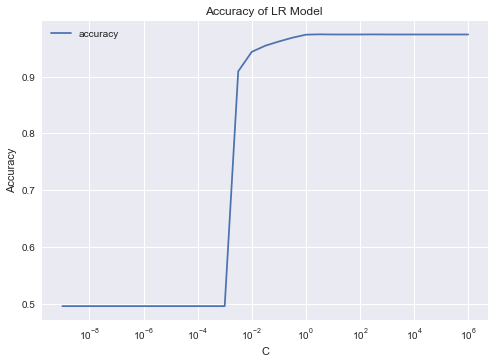

In [11]:
plt.xscale('log')
plt.plot(C_grid, acc_list, label='accuracy')
plt.legend()
plt.title("Accuracy of LR Model ")
plt.xlabel("C")
plt.ylabel("Accuracy")

In [12]:
acc_list

[0.4963095238095238,
 0.4963095238095238,
 0.4963095238095238,
 0.4963095238095238,
 0.4963095238095238,
 0.4963095238095238,
 0.4963095238095238,
 0.4963095238095238,
 0.4963095238095238,
 0.4963095238095238,
 0.4963095238095238,
 0.4963095238095238,
 0.4963095238095238,
 0.9092857142857143,
 0.9435714285714286,
 0.9544047619047619,
 0.9617857142857142,
 0.968452380952381,
 0.9738095238095238,
 0.9744047619047619,
 0.9741666666666666,
 0.9741666666666666,
 0.9741666666666666,
 0.9742857142857143,
 0.9741666666666666,
 0.9741666666666666,
 0.9741666666666666,
 0.9741666666666666,
 0.9741666666666666,
 0.9741666666666666,
 0.9741666666666666]

In [13]:
max(acc_list)

0.9744047619047619

Text(0, 0.5, 'Log_Loss')

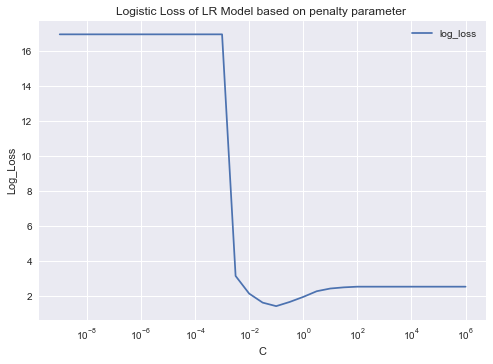

In [15]:
plt.xscale('log')
plt.plot(C_grid, loss_list, label='log_loss')
plt.legend()
plt.title("Logistic Loss of LR Model based on penalty parameter ")
plt.xlabel("C")
plt.ylabel("Log_Loss")

In [16]:
C_grid[17]

0.31622776601683794

In [17]:
min_loss = 10
min_arg = 0
for i in range(len(loss_list)):
    if loss_list[i] < min_loss:
        min_loss = loss_list[i]
        min_arg = i
        i+=1

print("The min log loss is: %.3f" %min_loss)
print("The min log loss index is: %s"%min_arg)
print("C value(L2 penalty) when min log loss is: %s"% C_grid[min_arg])

The min log loss is: 1.430
The min log loss index is: 16
C value(L2 penalty) when min log loss is: 0.1


In [16]:
lr_clf_l1 = LogisticRegression(penalty='l1',C=0.1, random_state=8, solver='liblinear')
lr_clf_l1.fit(X_train, y_train)
y_predict_l1 = lr_clf_l1.predict(X_test)
proba_l1 = lr_clf_l1.predict_proba(X_test)

D:\conda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
tn, fp, fn, tp = confusion_matrix(y_test,y_predict_l1).ravel()
(tn, fp, fn, tp)

(1772, 59, 90, 1679)

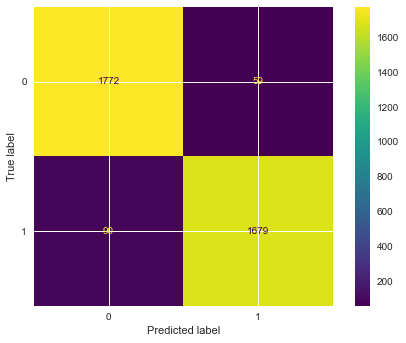

In [18]:
cm = confusion_matrix(y_test,y_predict_l1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

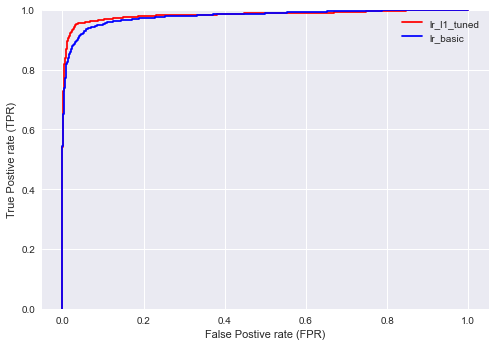

In [79]:
fpr2, tpr2, thresholds = metrics.roc_curve(y_test, proba_l1[:,1])
fpr, tpr, thresholds = metrics.roc_curve(y_test, proba[:,1])
# fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, proba)


plt.plot(fpr2, tpr2,color='red', label='lr_l1_tuned')
plt.plot(fpr, tpr,color='blue', label='lr_basic')
# plt.plot(fpr2, tpr2,color='red', label='CCCV')

plt.ylim([0, 1]);
plt.xlabel("False Postive rate (FPR)")
plt.ylabel("True Postive rate (TPR)")
plt.legend()

In [28]:
roc_auc_score(y_test, proba_l1[:,1])

0.9831561151316794

### Data Augmentation (filp)

In [29]:
samples = X_train.iloc[:9,:]
# samples.iloc[0]
# X_train

#### Image flip examples

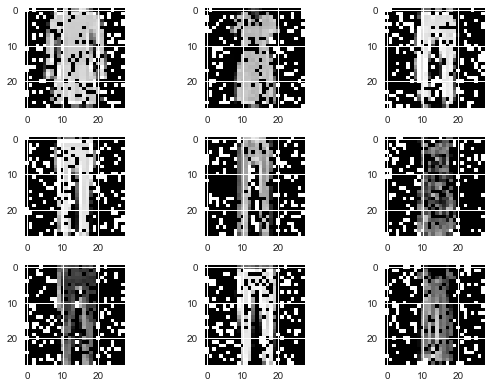

In [30]:
fig = plt.figure()
axes = []

for i in range(0,9):
    axes.append(fig.add_subplot(3,3,i+1))
#     subplot_title=("false positive image"+str(i+1))
#     axes[-1].set_title(subplot_title)
    plt.imshow(samples.iloc[i].to_numpy().reshape(28,28), cmap=plt.cm.gray, vmin=0.0, vmax=1.0)

fig.tight_layout()
plt.show()

In [31]:
X_train_np = X_train.to_numpy().reshape(X_train.shape[0],28,28)
X_test_np = X_test.to_numpy().reshape(X_test.shape[0],28,28)

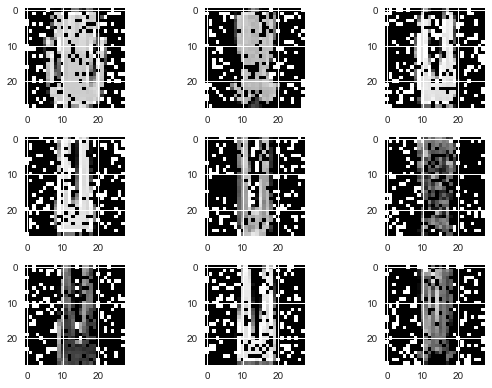

In [32]:
fig = plt.figure()
axes = []

for i in range(0,9):
    axes.append(fig.add_subplot(3,3,i+1))
#     subplot_title=("false positive image"+str(i+1))
#     axes[-1].set_title(subplot_title)
    plt.imshow(np.flip(samples.iloc[i].to_numpy().reshape(28,28),axis=0), cmap=plt.cm.gray, vmin=0.0, vmax=1.0)

fig.tight_layout()
plt.show()

In [33]:
X_train_flip = np.flip(X_train_np, axis=0)
X_test_flip = np.flip(X_test_np, axis=0)

In [34]:
X_train_flip_lr = X_train_flip.reshape(X_train_flip.shape[0],-1)
X_test_flip_lr = X_test_flip.reshape(X_test_flip.shape[0],-1)

In [35]:
X_train_np.shape

(8400, 28, 28)

In [36]:
type(X_train_flip_lr)

numpy.ndarray

In [37]:
type(X_train_np)

numpy.ndarray

In [38]:
X_train.shape

(8400, 784)

In [39]:
X_train_flip_lr.shape

(8400, 784)

In [40]:
X_train.to_numpy().shape

(8400, 784)

In [41]:
X_train_con = np.concatenate((X_train_flip_lr, X_train.to_numpy()))
X_test_con = np.concatenate((X_test_flip_lr, X_test.to_numpy()))
y_train_con = np.concatenate((y_train, y_train))
y_test_con = np.concatenate((y_test, y_test))

In [42]:
for data in [X_train_con, X_test_con, y_train_con, y_test_con]:
    print(data.shape)

(16800, 784)
(7200, 784)
(16800, 1)
(7200, 1)


In [58]:
lr_clf_flip = LogisticRegression(penalty='l1',solver='liblinear')
lr_clf_flip.fit(X_train_con, y_train_con)
y_predict_flip = lr_clf_flip.predict(X_test_con)
proba_flip = lr_clf_flip.predict_proba(X_test_con)
# y_predict.shape

acc1 = lr_clf_flip.score(X_test_con,y_predict_flip)
print("The accuracy for the basic model on test set is: %.3f" % acc1)
acc2 = lr_clf_flip.score(X_train_con,y_train_con)
print("The accuracy for the basic model on train set is: %.3f" % acc2)
log_loss1 = log_loss(y_test_con, y_predict_flip)
print("The log loss for the basic model is: %.3f" % log_loss1)

D:\conda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy for the basic model on test set is: 1.000
The accuracy for the basic model on train set is: 0.727
The log loss for the basic model is: 10.016


In [50]:
tn, fp, fn, tp = confusion_matrix(y_test_con,y_predict_flip).ravel()
(tn, fp, fn, tp)

(2623, 1039, 1065, 2473)

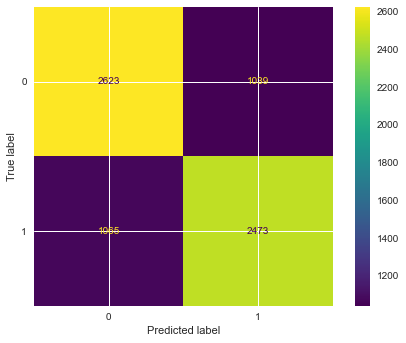

In [53]:
cm = confusion_matrix(y_test_con,y_predict_flip)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

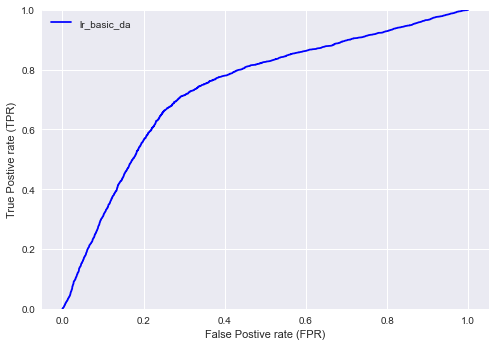

In [54]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_con, proba_flip[:,1])
# fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, proba)

plt.plot(fpr, tpr,color='blue', label='lr_basic_da')
# plt.plot(fpr2, tpr2,color='red', label='CCCV')

plt.ylim([0, 1]);
plt.xlabel("False Postive rate (FPR)")
plt.ylabel("True Postive rate (TPR)")
plt.legend()

In [46]:
roc_auc_score(y_test_con, proba_flip[:,1])

0.7369185736880599

In [64]:
C_grid = np.logspace(-9, 6, 31)
acc_list2 = []
loss_list2 = []
for c in C_grid:
    lr_clf_c_flip = LogisticRegression(penalty='l1',C=c, solver='liblinear')
    lr_clf_c_flip.fit(X_train_con, y_train_con)
    y_predict_c_flip = lr_clf_c_flip.predict(X_test_con)
    proba_c_flip = lr_clf_c_flip.predict_proba(X_test_con)
    acc = lr_clf_c_flip.score(X_train_con, y_train_con)
    acc_list2.append(acc)
    log_loss_c_flip = log_loss(y_test_con, y_predict_c_flip)
    loss_list2.append(log_loss_c_flip)

D:\conda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\conda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\conda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\conda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\c

Text(0, 0.5, 'Accuracy')

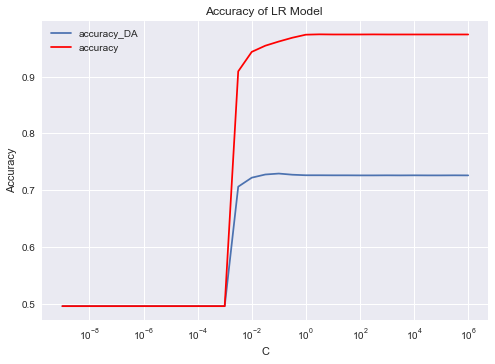

In [83]:
plt.xscale('log')
plt.plot(C_grid, acc_list2, label='accuracy_DA')
plt.plot(C_grid, acc_list, label='accuracy', color='red')
plt.legend()
plt.title("Accuracy of LR Model ")
plt.xlabel("C")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Log_Loss')

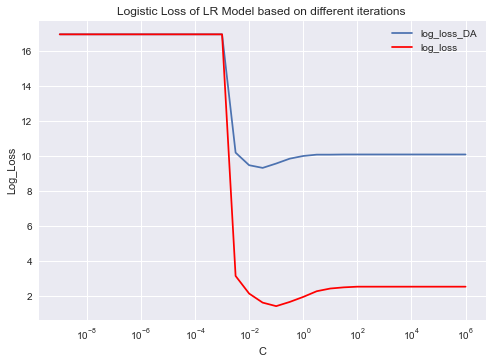

In [84]:
plt.xscale('log')
plt.plot(C_grid, loss_list2, label='log_loss_DA')
plt.plot(C_grid, loss_list, label='log_loss',color='red')
plt.legend()
plt.title("Logistic Loss of LR Model based on different iterations ")
plt.xlabel("C")
plt.ylabel("Log_Loss")

In [71]:
min_loss = 1000
min_arg = 0
for i in range(len(loss_list2)):
    if loss_list2[i] < min_loss:
        min_loss = loss_list2[i]
        min_arg = i
        i+=1

print("The min log loss is: %.3f" %min_loss)
print("The min log loss index is: %s"%min_arg)
print("C value(L2 penalty) when min log loss is: %s"% C_grid[min_arg])

The min log loss is: 9.335
The min log loss index is: 15
C value(L2 penalty) when min log loss is: 0.03162277660168379


In [72]:
lr_clf_flip2 = LogisticRegression(penalty='l1', C=0.0316,solver='liblinear')
lr_clf_flip2.fit(X_train_con, y_train_con)
y_predict_flip2 = lr_clf_flip2.predict(X_test_con)
proba_flip2 = lr_clf_flip2.predict_proba(X_test_con)
# y_predict.shape

acc1 = lr_clf_flip2.score(X_test_con,y_predict_flip2)
print("The accuracy for the basic model on test set is: %.3f" % acc1)
acc2 = lr_clf_flip2.score(X_train_con,y_train_con)
print("The accuracy for the basic model on train set is: %.3f" % acc2)
log_loss3 = log_loss(y_test_con, y_predict_flip2)
print("The log loss for the basic model is: %.3f" % log_loss3)

D:\conda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy for the basic model on test set is: 1.000
The accuracy for the basic model on train set is: 0.728
The log loss for the basic model is: 9.335


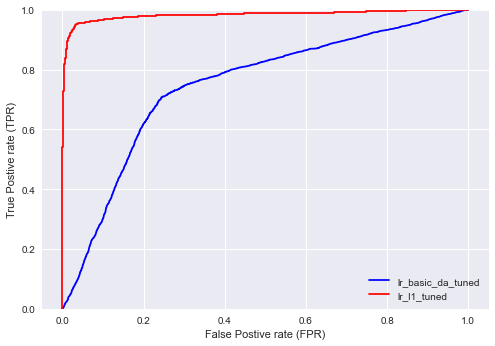

In [76]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_con, proba_flip2[:,1])
# fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, proba)
fpr2, tpr2, thresholds = metrics.roc_curve(y_test, proba_l1[:,1])
# fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, proba)

plt.plot(fpr, tpr,color='blue', label='lr_basic_da_tuned')
plt.plot(fpr2, tpr2,color='red', label='lr_l1_tuned')

plt.ylim([0, 1]);
plt.xlabel("False Postive rate (FPR)")
plt.ylabel("True Postive rate (TPR)")
plt.legend()

In [77]:
roc_auc_score(y_test_con, proba_flip2[:,1])

0.7468820227234065

### Part Three

In [20]:
test_shirt_x = pd.read_csv('troudress_test_x.csv')
yproba1_test = lr_clf_l1.predict_proba(test_shirt_x)[:, 1]
np.savetxt('yproba1_test.txt', yproba1_test)

In [4]:
from sklearn.ensemble import GradientBoostingClassifier

In [7]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

D:\conda\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9725

In [22]:
yproba2_test =  clf.predict_proba(test_shirt_x)[:,1]
np.savetxt('yproba2_test.txt', yproba2_test)

In [9]:
yproba2_test

array([3.39153906e-05, 9.99896152e-01, 2.39819671e-06, ...,
       9.99999992e-01, 9.99999978e-01, 2.98059354e-06])

In [21]:
yproba1_test

array([0.06744461, 0.67109694, 0.0977984 , ..., 0.99923161, 0.99971984,
       0.02270838])